In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive





[Ref](https://github.com/kroosen/GAN-in-keras-on-mnist)

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam, RMSprop
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.layers import *
from tqdm import tqdm_notebook
import pandas as pd
from keras.utils import plot_model, to_categorical

# Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
# (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
cd /content

/content


In [0]:
# cd /content/drive/My\ Drive/faraji/digikala

In [5]:
cd /content/drive/My Drive/zahra_Nafarieh/Digicala_NLP

/content/drive/My Drive/zahra_Nafarieh/Digicala_NLP


In [0]:

df_train = pd.read_excel('data_upsample.xlsx')
X_train = df_train['comment']
y_train = df_train['target']

In [0]:
x_train_0 = df_train[ df_train['target']==0 ]['comment']
x_train_1 = df_train[ df_train['target']==1 ]['comment']
x_train_2 = df_train[ df_train['target']==2 ]['comment']
x_train_3 = df_train[ df_train['target']==3 ]['comment']

In [8]:
X_g = pd.concat([x_train_0,x_train_1])
X_d = pd.concat([x_train_2 ,x_train_3])

X_g.shape

(114494,)

In [0]:
num_features=50
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = num_features)
tokenizer.fit_on_texts(X_d)
tokenizer.fit_on_texts(X_g)

data_d = tokenizer.texts_to_sequences(X_d)
latent_g = tokenizer.texts_to_sequences(X_g)


d_data = pad_sequences(data_d, padding = "post", maxlen =64)
g_latent = pad_sequences(latent_g, padding = "post", maxlen =64)

In [10]:
# X_g=X_g[:60000]
g_latent.shape , d_data.shape #, X_train.shape

((114494, 64), (114494, 64))

In [0]:
# Preprocessing

# X_train = X_train.reshape(60000, 784)
# X_test = X_test.reshape(10000, 784)
# X_train = X_train.astype('float32')/255
# X_test = X_test.astype('float32')/255




# print(X_train.shape, y_train.shape)
# #convert y to one hot vector
# y_train =tf.keras.utils.to_categorical(y_train)
# # Split train data into train and validation
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.4)
# print(x_train.shape, y_train.shape)


In [0]:

# Set the dimensions of the noise
z_dim = 64

In [0]:
# Optimizer
adam = Adam(lr=0.0002, beta_1=0.5)

In [13]:
#Genaraitor
g = Sequential()

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#WE  GET :
#z_dim = input_length

g.add(Embedding(256, 64, input_length=64))
# main_input = Input(shape=(100,), dtype='int32', name='main_input')
# x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)
# lstm_out = LSTM(32)(x)

g.add(Dense(256, input_dim=z_dim, activation=LeakyReLU(alpha=0.2)))
#@@@@@
g.add(Reshape((2, 2*64, 64)))
g.add(BatchNormalization())
g.add(Activation(LeakyReLU(alpha=0.2)))
g.add(Conv2DTranspose(56, 5, strides=2, padding='same'))
#@@@@@
# g.Embedding(512, 10000, input_length=100)
#@@@@@
g.add(Dense(512, activation=LeakyReLU(alpha=0.2)))
g.add(BatchNormalization())
g.add(Activation(LeakyReLU(alpha=0.2)))
g.add(Conv2DTranspose(1, 5, strides=2, padding='same', activation='softmax'))
#@@@@@
g.add(BatchNormalization())
g.add(Activation(LeakyReLU(alpha=0.2)))
g.add(Reshape((1*64,64)))
g.add(LSTM(256, input_shape=(1,64)))
#@@@@@
g.add(Dense(1024, activation=LeakyReLU(alpha=0.2)))
#@@@@@
g.add(BatchNormalization())
g.add(Activation(LeakyReLU(alpha=0.2)))
#@@@@@
g.add(Dense(64, activation='sigmoid'))  # Values between 0 and 1
g.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy']  )

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# g.summary()
# plot_model(g, to_file='generaitor.png', show_shapes=True)


In [14]:
#Discriminator
d = Sequential()
d.add(Dense(1024, input_dim=64, activation=LeakyReLU(alpha=0.2)))
#@@@@@
g.add(BatchNormalization())
g.add(Activation(LeakyReLU(alpha=0.2)))
#@@@@@
d.add(Dropout(0.3))
d.add(Dense(512, activation=LeakyReLU(alpha=0.2)))
#@@@@@
g.add(BatchNormalization())
g.add(Activation(LeakyReLU(alpha=0.2)))
#@@@@@
d.add(Dropout(0.3))
d.add(Dense(256, activation=LeakyReLU(alpha=0.2)))
#@@@@@
g.add(BatchNormalization())
g.add(Activation(LeakyReLU(alpha=0.2)))
#@@@@@
d.add(Dropout(0.3))
d.add(Dense(1, activation='sigmoid'))  # Values between 0 and 1
d.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy']  )

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [0]:
# d.summary()
# plot_model(d, to_file='discriminator.png', show_shapes=True)

In [0]:
#GAN
d.trainable = False
inputs = Input(shape=(z_dim, ))
hidden = g(inputs)
output = d(hidden)
gan = Model(inputs, output)
gan.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy']  )

In [0]:
# gan.summary()
# plot_model(gan, to_file='generator.png', show_shapes=True)

In [0]:
def plot_loss(losses):
    """
    @losses.keys():
        0: loss
        1: accuracy
    """
    d_loss = [v[0] for v in losses["D"]]
    g_loss = [v[0] for v in losses["G"]]
    #d_acc = [v[1] for v in losses["D"]]
    #g_acc = [v[1] for v in losses["G"]]
    
    plt.figure(figsize=(10,8))
    plt.plot(d_loss, label="Discriminator loss")
    plt.plot(g_loss, label="Generator loss")
    #plt.plot(d_acc, label="Discriminator accuracy")
    #plt.plot(g_acc, label="Generator accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
# def plot_generated(n_ex=10, dim=(1, 10), figsize=(12, 2)):
#     noise = np.random.normal(0, 1, size=(n_ex, z_dim))
#     generated_images = g.predict(noise)
#     generated_images = generated_images.reshape(n_ex, 28, 28)

#     plt.figure(figsize=figsize)
#     for i in range(generated_images.shape[0]):
#         plt.subplot(dim[0], dim[1], i+1)
#         plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
#         plt.axis('off')
#     plt.tight_layout()
#     plt.show()


In [0]:
# Set up a vector (dict) to store the losses
losses = {"D":[], "G":[]}

def train(epochs=10, plt_frq=1, BATCH_SIZE=128):
    batchCount = int(d_data.shape[0] / BATCH_SIZE)
    # print('Epochs:', epochs)
    # print('Batch size:', BATCH_SIZE)
    # print('Batches per epoch:', batchCount)
    
    for e in tqdm_notebook(range(1, epochs+1)):
        if e == 1 or e%plt_frq == 0:
            print('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in range(batchCount):  # tqdm_notebook(range(batchCount), leave=False):
            # Create a batch by drawing random index numbers from the training set
            text_batch = d_data[np.random.randint(0, d_data.shape[0], size=BATCH_SIZE)]
            # Create noise vectors for the generator

            #@@@@@@@@@
            # noise = np.random.normal(0, 1, size=(BATCH_SIZE, z_dim))
            noise = g_latent[np.random.randint(0, g_latent.shape[0], size=BATCH_SIZE)]
            # print(noise.shape)
            #@@@@@@@

            # Generate the images from the noise
            generated_texts = g.predict(noise)

            # print("noise.shape ,text_batch.shape , generated_texts.shape" , noise.shape ,text_batch.shape , generated_texts.shape )

            X = np.concatenate((text_batch, generated_texts))
            # Create labels
            y = np.zeros(2*BATCH_SIZE)
            y[:BATCH_SIZE] = 1#0.9  # One-sided label smoothing
            #@@@@@@@@
            ####

            # Train discriminator on generated images
            d.trainable = True
            d_loss = d.train_on_batch(X, y)

            # Train generator
            # noise = np.random.normal(0, 1, size=(BATCH_SIZE, z_dim))
            noise = g_latent[np.random.randint(0, g_latent.shape[0], size=BATCH_SIZE)]

            #@@@@@@
            print(noise.shape)

            y2 = np.ones(BATCH_SIZE)
            # d.trainable = False
            d.trainable = False

            g_loss = gan.train_on_batch(noise, y2)

            #@@@@@@@
            # l, l_rf, acc_rf, l_labels, acc_labels = gan.train_on_batch(noise, y2)  
        # Only store losses from final batch of epoch
        losses["D"].append(d_loss)
        losses["G"].append(g_loss)

        # Update the plots
        # if e == 1 or e%plt_frq == 0:
            # plot_generated()
    plot_loss(losses)

--------------- Epoch 1 ---------------


(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64

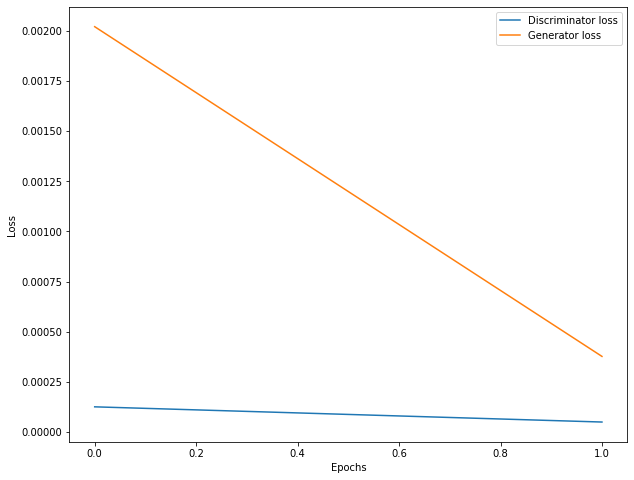

In [20]:
train(epochs=2, plt_frq=1, BATCH_SIZE=128)

[GAN — Ways to improve GAN performance](https://towardsdatascience.com/gan-ways-to-improve-gan-performance-acf37f9f59b)

![](https://miro.medium.com/max/1200/1*8dMXLw6Z3pCozGHrZxLOrA.png)